In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # อ่านข้อมูลจากไฟล์ CSV
# df = pd.read_csv('province/export-jsps014-1h.csv')

# # กำหนดเกณฑ์สำหรับค่า pm_10
# df = df[(df['pm_10'] >= 0) & (df['pm_10'] <= 80)]

# # ตั้งค่าแกน x และ y
# x = df['timestamp']
# y_columns = ['humidity', 'pm_10', 'pm_2_5', 'temperature']

# # พลอตกราฟเส้นที่มีจุด
# plt.figure(figsize=(10, 6))
# for column in y_columns:
#     plt.plot(x, df[column], marker='o', label=column)

# # ตั้งค่าชื่อแกนและชื่อกราฟ
# plt.xlabel('Date')
# plt.ylabel('Values')
# plt.title('Time Series Data')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

# # แสดงกราฟ
# plt.show()
# print(df.duplicated().sum())

In [ ]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('province/export-jsps014-1h.csv', parse_dates=['timestamp'], index_col='timestamp')

# ลบคอลัมน์ที่ไม่มีชื่อ (Unnamed)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# ตั้งค่าความถี่เป็นรายชั่วโมง
df = df.asfreq('H')

# ตรวจสอบข้อมูลที่ขาดหายไป
missing_data = df[df.isnull().any(axis=1)]
print("Missing data:")
print(missing_data)

# แยกคอลัมน์ที่เป็นประเภท object ออกมาก่อน
df_objects = df.select_dtypes(include=['object'])
df_numeric = df.select_dtypes(exclude=['object'])

# เติมข้อมูลที่ขาดหายไปในคอลัมน์ที่เป็นตัวเลขด้วยการ interpolate
df_numeric_interpolated = df_numeric.interpolate()

# เติมข้อมูลที่ขาดหายไปในคอลัมน์ที่เป็นประเภท object ด้วยการ forward fill และ backward fill
df_objects_filled = df_objects.fillna(method='ffill').fillna(method='bfill')

# รวมข้อมูลกลับเข้าด้วยกัน
df_interpolated = pd.concat([df_numeric_interpolated, df_objects_filled], axis=1)

# ตรวจสอบข้อมูลที่ขาดหายไปอีกครั้งหลังจากการ interpolate
missing_data_after_interpolating = df_interpolated[df_interpolated.isnull().any(axis=1)]
print("Missing data after interpolating:")
print(missing_data_after_interpolating)

# ตรวจสอบว่ามีข้อมูลครบ 24 ชั่วโมงทุกวันหรือไม่
df_interpolated['date'] = df_interpolated.index.date
hourly_counts = df_interpolated.groupby('date').size()
incomplete_days = hourly_counts[hourly_counts != 24]
print("Days with incomplete data:")
print(incomplete_days)

# แสดงข้อมูลที่ clean แล้ว
print("Cleaned data:")
print(df_interpolated.head())

# ลบคอลัมน์ date ที่เพิ่มเข้ามา
df_interpolated = df_interpolated.drop(columns=['date'])

# บันทึกข้อมูลที่ clean แล้วลงไฟล์ใหม่
df_interpolated.to_csv('province/export-jsps014-1h_cleaned.csv')

Missing data:
                    timezone  humidity  pm_2_5  pm_2_5_sp  temperature  \
timestamp                                                                
2022-03-17 19:00:00      NaN       NaN     NaN        NaN          NaN   
2022-03-17 20:00:00      NaN       NaN     NaN        NaN          NaN   
2022-03-17 21:00:00      NaN       NaN     NaN        NaN          NaN   
2022-03-17 22:00:00      NaN       NaN     NaN        NaN          NaN   
2022-03-17 23:00:00      NaN       NaN     NaN        NaN          NaN   
...                      ...       ...     ...        ...          ...   
2025-02-11 07:00:00      NaN       NaN     NaN        NaN          NaN   
2025-02-11 08:00:00      NaN       NaN     NaN        NaN          NaN   
2025-02-11 09:00:00      NaN       NaN     NaN        NaN          NaN   
2025-02-11 10:00:00      NaN       NaN     NaN        NaN          NaN   
2025-02-11 11:00:00      NaN       NaN     NaN        NaN          NaN   

                    loc

/var/folders/x_/lq083y1j115fh3cygnc627p00000gn/T/ipykernel_24523/346699059.py:18: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


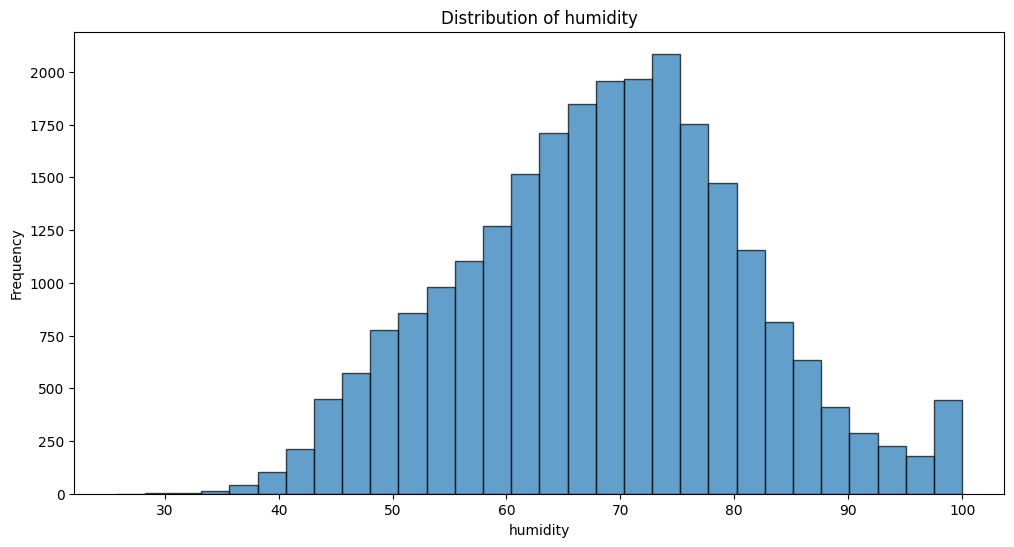

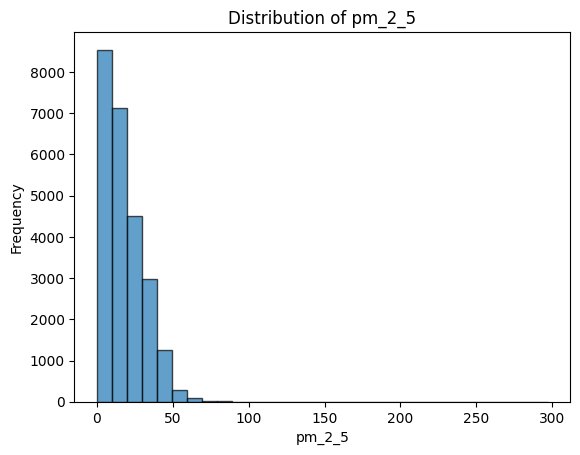

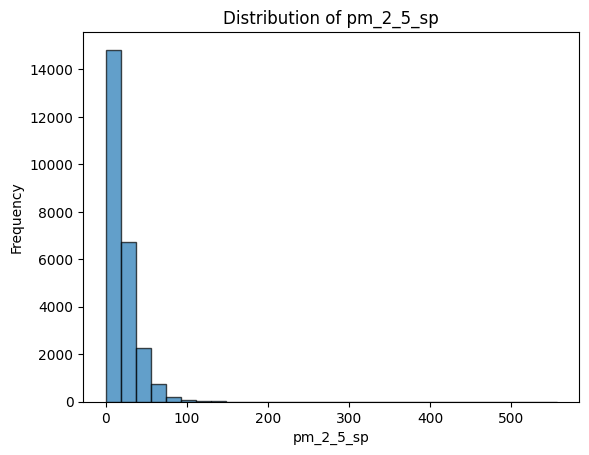

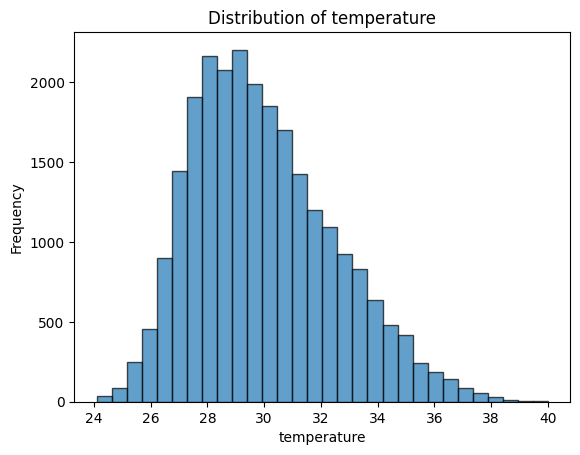

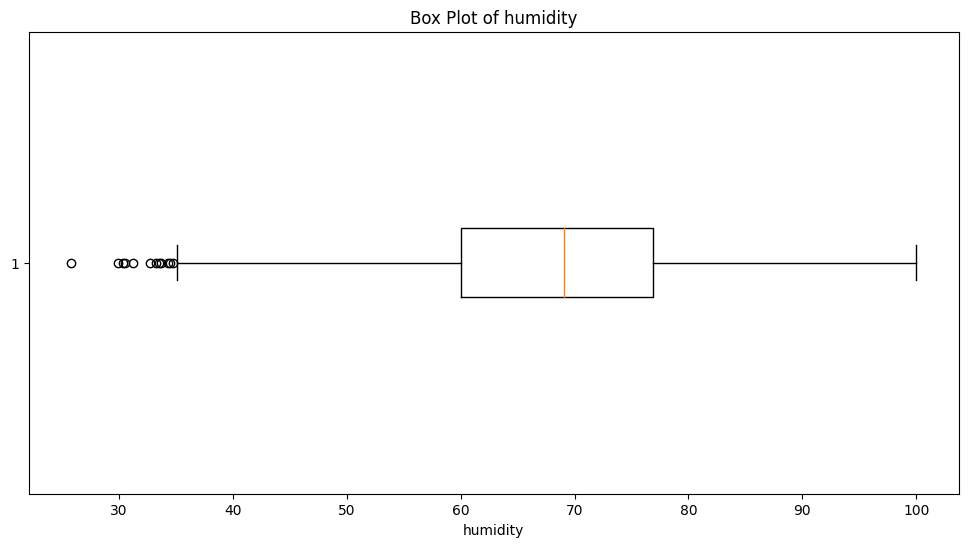

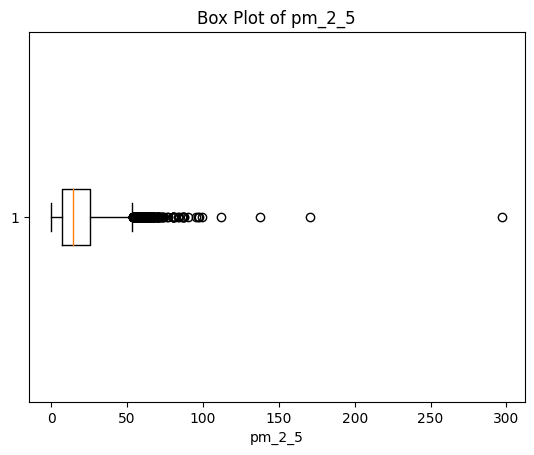

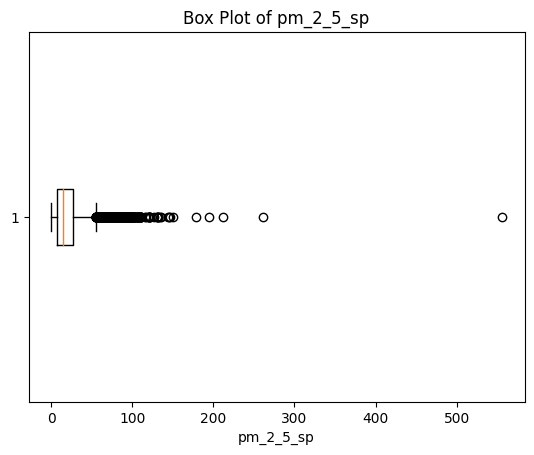

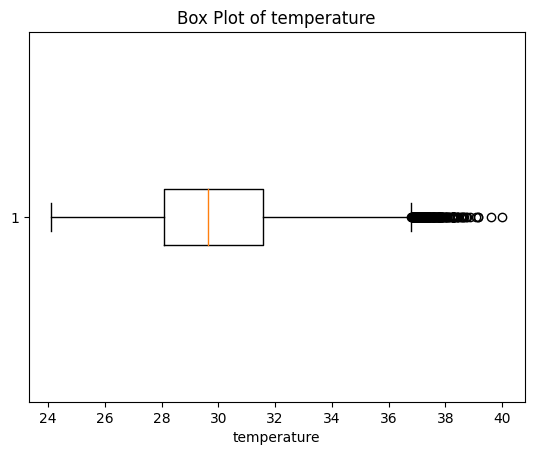

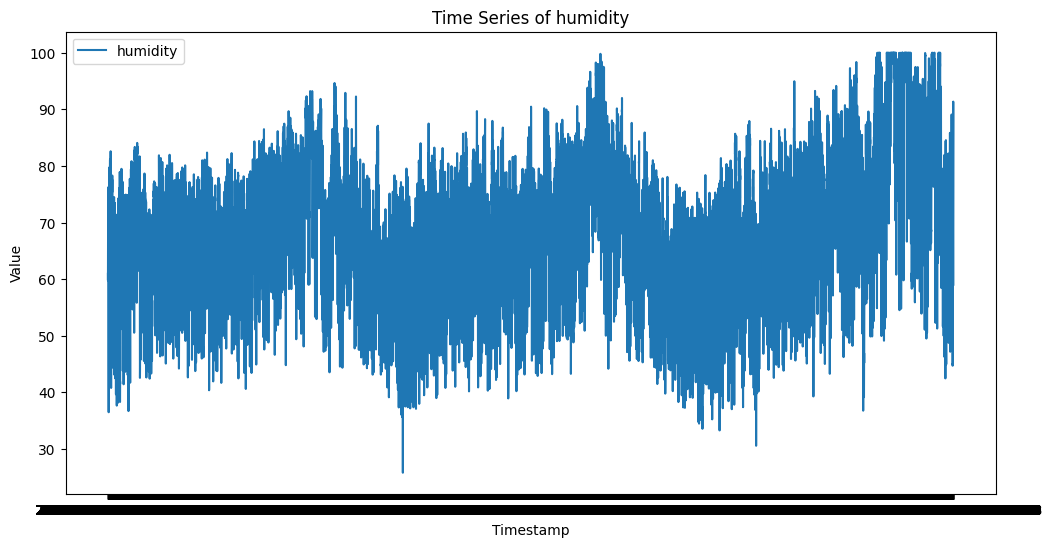

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านข้อมูลจากไฟล์ CSV
df = pd.read_csv('province/export-jsps014-1h.csv', parse_dates=['timestamp'], index_col='timestamp')

# ลบคอลัมน์ที่ไม่มีชื่อ (Unnamed)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# แยกคอลัมน์ที่เป็นตัวเลข
df_numeric = df.select_dtypes(exclude=['object'])

# พล็อตกราฟกระจายตัว (Histogram) ด้วย matplotlib
plt.figure(figsize=(12, 6))
for column in df_numeric.columns:
    plt.hist(df_numeric[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# พล็อต Box Plot เพื่อตรวจสอบ outliers ด้วย matplotlib
plt.figure(figsize=(12, 6))
for column in df_numeric.columns:
    plt.boxplot(df_numeric[column].dropna(), vert=False)  # vert=False เพื่อให้กราฟเป็นแนวนอน
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

# พล็อตกราฟเส้น (Line Plot) สำหรับข้อมูล time series
plt.figure(figsize=(12, 6))
for column in df_numeric.columns:
    plt.plot(df_numeric.index, df_numeric[column], label=column)
    plt.title(f'Time Series of {column}')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()
    plt.show()